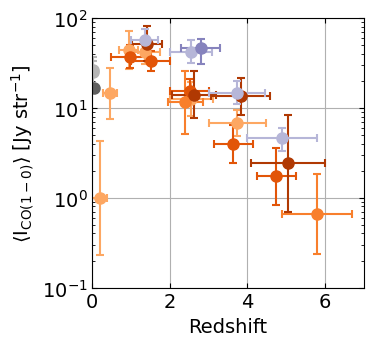

In [7]:
import numpy as np

# MPL
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib import rcParams
pltsty = {
    'font.size' : 14,

    # Axis appearance
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,

    # Legends
    'legend.frameon' : False,

    # Lines
    'lines.dashed_pattern' : [5,3],
}
rcParams.update(pltsty)

# Constants:
wl_co = 2.6e-3 # m

# Cosmology - I'm using Planck for simplicity, more technically correct would be to get the cosmology from each paper
from astropy.cosmology import Planck18 as cosmo

# Convert rho_mol to ICO(1-0)
def rhomol_to_ico(rho, redshift, cosmo=cosmo, alpha=3.6):
    d = cosmo.comoving_distance(redshift).value     # comoing distance at z in Mpc
    dl = (1+redshift)*d                             # luminosity distance to z in Mpc
    y = wl_co * (1+redshift)**2 / (1000*cosmo.H(redshift).value)  # derivative of distance with respect to frequency in Mpc / Hz

    e_line = rho/alpha*4.9e-5                         # in Lsun/Mpc^3
    s_line = e_line / (4*np.pi*dl**2) * d**2 * y      # in Lsun / Mpc^2 * Mpc^2/Sr * Mpc/Hz
    s_line = s_line * 3.828e26                        # in W / Sr / Mpc^2 / Hz
    s_line = s_line / (3.0857e22)**2                  # in W / Sr / m^2 / Hz
    s_line = 1e26 * s_line                            # in Jy/Sr

    return s_line

# Observational data; group corresponds to where the measurement came from: 
#   10 = mmIME (Keating) 
#   11 = COPSS (Keating)
#   20 = Andreani+20
#   21 = Fletcher+21
#   0 = ASPECS (Decarli)
#   1 = COLDz
#   2 = PHIBSS2 (Lenkic)
#   3 = NOEMA HDF-N (Boogaard)
zmin = [1.0,2.0,3.0,4.0]            + [2.3]    + [0.003,0.003] + [0.015] #+ [2.3]   
zmax = [1.7,3.1,4.45,5.8]           + [3.3]    + [0.006,0.006] + [0.05] #+ [3.3]  
rhom = [7.5e7,9.7e7,5.1e7,2.2e7]    + [11.8e7] + [1.6e7,1.5e7] + [1.0e7] #+ [2.5e8]
rhom_eu = [2.2e7,3.2e7,1.8e7,0.7e7] + [2.8e7]  + [0.6e7,0.5e7] + [0] #+[0]
rhom_el = [1.8e7,2.5e7,1.3e7,0.6e7] + [4.1e7]  + [0.6e7,0.5e7] + [0] #+[0]
line = [2,3,4,5]                    + [1]      + [1,1]         + [1] #+[1]
ratio = [0.76, 0.42, 0.31, 0.23]    + [1]      + [1,1]         + [1]
group = [10 for i in range(4)]      + [11]     + [20,20]       + [21] #+[12]

zmin_dd = [.271,.695,.003,1.006,2.008,3.011]                + [1.95,4.9]    + [0.4799,1.0056,2.0084,3.1404,4.2451]      + [1.0345,2.0517,3.0687,4.0856]
zmax_dd = [.631,1.174,.369,1.738,3.107,4.475]               + [2.85,6.7]    + [1.4799,2.0056,3.0084,4.1404,5.2451]      + [1.798,3.1969,4.5956,5.9941]
rhoml_dd = [.572e7,2.772e7,.015e7,4.053e7,1.844e7,1.686e7]  + [1.1e7,.14e7] + [29.31e6,36.55e6,26.2e6,8.22e6,3.83e6]    + [10**7.65,10**7.26,10**7.48,10**6.54]
rhomu_dd = [2.148e7,7.371e7,.281e7,7.489e7,4.438e7,3.289e7] + [5.6e7,1.1e7] + [52.38e6,59.98e6,46.95e6,21.76e6,16.58e6] + [10**8.04,10**7.78,10**7.89,10**7.62]
ratio_dd = [0.46,0.31,1,0.75,0.8,0.61]                      + [1,0.7]       + [.76,.76,.42,.31,.23]                     + [0.75,0.8,0.61,0.44] # Don't actually know what COLDz used for CO(2-1)
line_dd = [3,4,1,2,3,4]                                     + [1,2]         + [2,2,3,4,5]                               + [2,3,4,5] # PHIBSS had multiple lines, assuming one with most sources in relevant redshift range
group_dd = [0 for i in range(6)]                            + [1,1]         + [2 for i in range(5)]                     + [3 for i in range(4)]
rhom_dd = np.sqrt((np.array(rhomu_dd)*np.array(rhoml_dd)))
rhom_eu_dd = np.array(rhomu_dd)-rhom_dd
rhom_el_dd = rhom_dd-np.array(rhoml_dd)

zmin = zmin_dd + zmin
zmax = zmax_dd + zmax
rhom = np.concatenate((rhom_dd,rhom,))
rhom_eu = np.concatenate((rhom_eu_dd,rhom_eu,))
rhom_el = np.concatenate((rhom_el_dd,rhom_el,))
line = line_dd + line
ratio = ratio_dd + ratio
group = group_dd + group

z = (np.array(zmin)+np.array(zmax))/2
dz = (np.array(zmax)-np.array(zmin))/2

icoobs = rhomol_to_ico(rhom, z, cosmo)
icoobs_eu = rhomol_to_ico(rhom_eu, z, cosmo)
icoobs_el = rhomol_to_ico(rhom_el, z, cosmo)

# Figure
fix, ax = plt.subplots(1,figsize=(3.5,3.5))

ax.set(xlabel='Redshift', 
       ylabel=r'$\langle$I$_\mathregular{CO(1-0)}\rangle$ [Jy str$^{-1}$]',
       yscale='log',ylim=(0.1,100),
       xlim=(0,7))
ax.grid()


for i in range(len(zmax)):
    if group[i]<10:
        c = colormaps['Oranges'](0.4+group[i]/4*.6)
    elif group[i]<20:
        c = colormaps['Purples'](0.4+(group[i]-10)/3*.6)
    else:
        c = colormaps['Greys'](0.4+(group[i]-20)/2*.6)
    label = '_'
    if i == 0:
        label = 'observations'
    _, caps, _ = ax.errorbar(z[i],icoobs[i],[[icoobs_el[i]],[icoobs_eu[i]]],[[z[i]-zmin[i]],[zmax[i]-z[i]]],marker='o',ls='none',color=c,markersize=8,capsize=3,elinewidth=1.5,label=label)
    for cap in caps:
        cap.set_markeredgewidth(1.5)

plt.show()


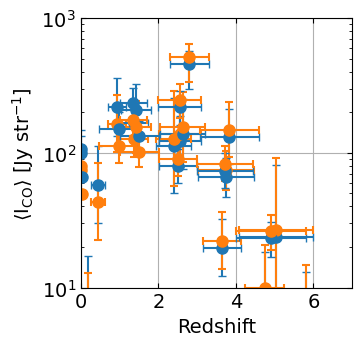

In [8]:
z = (np.array(zmin)+np.array(zmax))/2
dz = (np.array(zmax)-np.array(zmin))/2

icoobs = rhomol_to_ico(rhom, z, cosmo)
icoobs_eu = rhomol_to_ico(rhom_eu, z, cosmo)
icoobs_el = rhomol_to_ico(rhom_el, z, cosmo)

# Adjust back to original lines where possible
icoobsj = icoobs * np.array(ratio)
icoobsj_el = icoobs_el * np.array(ratio)
icoobsj_eu = icoobs_eu * np.array(ratio)

# New ratios
def get_ratio(line, redshift):
    line = np.array(line,ndmin=1)
    r = np.zeros(line.shape)
    r[line==1] = 1
    r[(line==2) & (redshift<1.9)] = 0.75
    r[(line==3) & (redshift<1.9)] = 0.46
    r[(line==4) & (redshift<1.9)] = 0.25
    r[(line==5) & (redshift<1.9)] = 0.12
    r[(line==2) & (redshift>=1.9)] = 0.97
    r[(line==3) & (redshift>=1.9)] = 0.80
    r[(line==4) & (redshift>=1.9)] = 0.61
    r[(line==5) & (redshift>=1.9)] = 0.44
    return r

# Multiply by original ratio to get close as possible to measured value
# Then multiply by r41 / rJ1 (new values) to get to CO(4-3)
# Then multipy by 4^2 to get units right
icoobs43 = icoobs * np.array(ratio) * get_ratio(np.ones(icoobs.shape)*4, z) / get_ratio(line, z) * 4**2
icoobs43_el = icoobs_el * np.array(ratio) * get_ratio(np.ones(icoobs.shape)*4, z) / get_ratio(line, z) * 4**2
icoobs43_eu = icoobs_eu * np.array(ratio) * get_ratio(np.ones(icoobs.shape)*4, z) / get_ratio(line, z) * 4**2

# Same for 5-4
icoobs54 = icoobs * np.array(ratio) * get_ratio(np.ones(icoobs.shape)*5, z) / get_ratio(line, z) * 5**2
icoobs54_el = icoobs_el * np.array(ratio) * get_ratio(np.ones(icoobs.shape)*5, z) / get_ratio(line, z) * 5**2
icoobs54_eu = icoobs_eu * np.array(ratio) * get_ratio(np.ones(icoobs.shape)*5, z) / get_ratio(line, z) * 5**2

# Figure
fix, ax = plt.subplots(1,figsize=(3.5,3.5))

ax.set(xlabel='Redshift', 
       ylabel=r'$\langle$I$_\mathregular{CO}\rangle$ [Jy str$^{-1}$]',
       yscale='log',ylim=(10,1000),
       xlim=(0,7))
ax.grid()

for i in range(len(zmax)):
    _, caps, _ = ax.errorbar(z[i],icoobs43[i],[[icoobs43_el[i]],[icoobs43_eu[i]]],[[z[i]-zmin[i]],[zmax[i]-z[i]]],marker='o',ls='none',color='C0',markersize=8,capsize=3,elinewidth=1.5,label=label)
    _, caps, _ = ax.errorbar(z[i],icoobs54[i],[[icoobs54_el[i]],[icoobs54_eu[i]]],[[z[i]-zmin[i]],[zmax[i]-z[i]]],marker='o',ls='none',color='C1',markersize=8,capsize=3,elinewidth=1.5,label=label)
    for cap in caps:
        cap.set_markeredgewidth(1.5)

plt.show()


In [14]:
# save all data to a file
import pickle
data = {
    'zmin': zmin,
    'zmax': zmax,
    'rhom': rhom,
    'rhom_eu': rhom_eu,
    'rhom_el': rhom_el,
    'line': line,
    'ratio': ratio,
    'group': group,
    'icoobs43': icoobs43,
    'icoobs43_el': icoobs43_el,
    'icoobs43_eu': icoobs43_eu,
    'icoobs54': icoobs54,
    'icoobs54_el': icoobs54_el,
    'icoobs54_eu': icoobs54_eu,
}

with open('./data/ico_intensity_data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [9]:
icoobs43

array([ 57.94389183, 218.7319176 ,   3.95389264, 167.57050844,
       121.82892128,  66.03439341, 112.74544962,   4.6562005 ,
       150.83603968, 134.37785211,  79.98853705,  19.68158263,
         8.80017834, 207.83895386, 137.31142507, 132.10322195,
        23.58113336, 233.94210556, 217.52940446,  73.08678714,
        23.35470697, 457.10984039, 106.86984201, 100.19047688,
        65.90969421])

In [10]:
x = np.ones(4)*4
z = np.linspace(0.00,2,4)
get_ratio(x,z)

array([0.25, 0.25, 0.25, 0.61])

In [11]:
ratio

[0.46,
 0.31,
 1,
 0.75,
 0.8,
 0.61,
 1,
 0.7,
 0.76,
 0.76,
 0.42,
 0.31,
 0.23,
 0.75,
 0.8,
 0.61,
 0.44,
 0.76,
 0.42,
 0.31,
 0.23,
 1,
 1,
 1,
 1]

In [12]:
get_ratio(line, z)

ValueError: operands could not be broadcast together with shapes (25,) (4,) 

In [13]:
line==1

False